<a href="https://colab.research.google.com/github/jpolsak/ds_car_price_prediction/blob/main/Colab/Proyecto_Final_Polsak.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PREDICCIÓN DEL PRECIO DE UN AUTO EN FUNCIÓN DE SUS CARACTERÍSTICAS**

## **ABSTRACT**

La industria automotriz es una rama importante desde el punto de vista económico. Contribuye con una porción significativa del producto interno bruto mundial (3,65%) y es estratégica para varias regiones del mundo. En el año 2019, la industria automotriz sostuvo el 10% del comercio mundial (1).

Más allá de la venta de autos nuevos existe un comercio de autos usados. Se puede destacar que en Argentina, solamente en 2023, se han vendido más de un millón y medio de autos usados (2).

Partiendo de estas características se ha decidido entender cuáles son las variables que influyen en el precio de un auto. Predecir su valor puede ser muy útil para que diferentes actores de esta industria puedan tomar decisiones económicas fundamentadas (por ejemplo, los fabricantes, a la hora de planificar los nuevos modelos, podrán ponderar qué características influyen en el precio y realizar el análisis de costo-beneficio; los comercios de reventa podrán fijar precios de compra y venta que le permitan tener un margen de ganancia atractivo y/o desestimar los autos que su reventa no sea rentable).

Para lograr el objetivo antes planteado se parte de un dataset obtenido de Kaggle (3) donde se encuentra un detalle de más de 19000 registros de autos con sus características y precio lo que permitirá generar un modelo de regresión para predecir su valor. Entre las características que se pueden mencionar dentro del dataset se encuentran: la empresa que fabricó el auto (Lexus, Chevrolet, etc.), modelo del auto, categoría (jeep, limusina, sedan, etc.), interiores de cuero, cantidad de kilómetros recorridos, cantidad de cilindros, tipo de caja, tracción, cantidad de puertas, color y airbags.

Fuentes:

(1) Automotive supply chain digitalization - Nathalie Fabbe-Costes, Lucie Lechaptois, in The Digital Supply Chain, 2022

(2) https://www.ambito.com/economia/autos-usados-se-vendieron-mas-un-millon-y-medio-2023-n5903463

(3) https://www.kaggle.com/datasets/deepcontractor/car-price-prediction-challenge

##**1. DEFINICIÓN DEL OBJETIVO**

El objetivo principal es entender el comportamiento del precio de los autos para poder maximizar las ganancias tanto de la industria automotriz como de las empresas de reventa de autos usados. Para lograr el objetivo se utilizará un modelo de regresión con el fin de predecir el precio en base a las variables representativas.

##**2. CONTEXTO COMERCIAL**

La industria automotriz constituye una parte importante del producto bruto interno mundial y genera muchos puestos de trabajo. Es una industria estratégica para ciertos países. Los autos usados además generan un comercio interno mediante su reventa (ya sea entre particulares o con empresas de reventa intermediadoras). Para estos actores es útil contar con una herramienta de predicción del precio de los autos para tomar mejores decisiones y maximizar las ganancias. En este sentido, es atractivo entender cómo las caracterísitcas de los autos influyen en su precio.

##**3. PROBLEMA COMERCIAL - HIPÓTESIS**

Partiendo del objetivo principal de la investigación se desprenden las siguientes hipótesis a probar:
1. El interior de cuero aumenta el precio del auto.
2. Los autos con motor turbo tienen un precio mayor.
3. Los autos con caja manual son más económicos.
4. Los autos más nuevos tienen precios más elevados.
5. Los autos con tracción de las cuatro ruedas (4x4) son los más caros.
5. Los colores poco usuales están relacionados a precios más bajos.


##**4. CONTEXTO ANALÍTICO**

El dataset elegido fue obtenido desde Kaggle (https://www.kaggle.com/datasets/deepcontractor/car-price-prediction-challenge) y es un detalle de más de 19k autos con sus respectivos precios en formato csv.
Las variables (caracterísitcas) que se detallan son las siguientes:
- ID: identificador del registro (no relevante para el análisis)
- Price: precio del auto
- Levy: impuestos aplicados
- Manufacturer: empresa elaboradora del auto (ejemplo: Lexus, Chevrolet, etc.)
- Model: modelo del auto
- Category: categoría (Jeep, limusina, sedan, etc.)
- Leather interior: si posee interior de cuero
- Fuel type: tipo de combustible utilizado por el motor
- Mileage: cantidad de km recorridos
- Cylinders: cantidad de cilindros que posee el motor
- Gear box type: tipo de caja (automático, manual, etc.)
- Drive wheels: tipo de tracción (delantera, trasera, 4x4)
- Doors: cantidad de puertas
- Color: color del auto
- Airbag: bolsas de aire

A continuación se procede a descargar los datos del archivo en csv y transformarlo para acondicionarlo para su análisis.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df0 = pd.read_csv('https://raw.githubusercontent.com/jpolsak/datasets/main/car_price_prediction.csv')

In [ ]:
df0

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


Se hacen ciertas correcciones sobre el dataset original para que pueda ser leído correctamente:

- Se modifican los valores de la variable "Doors" a valores coherentes (los valores 04-may y 02-may se traducen a 4 y 2 respectivamente, el valor >5 se mantiene)
- Se eliminan los "km" agregados a la variable "Mileage" para que pueda ser utilizada numéricamente
- Se modifican los "-" de la variable "Levy" para que representen nulos
- Se divide la variable "Engine volume" en dos: "Engine volume" que mantiene el valor numérico y en una nueva variable booleana llamada "Turbo" que indica yes/no.

El dataset resultante se muestra a continuación.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/jpolsak/datasets/main/car_price_prediction_modif.csv')

In [ ]:
df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Turbo,Mileage_km,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,no,186005,6,Automatic,4x4,4,Left wheel,Silver,12
1,44731507,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,no,192000,6,Tiptronic,4x4,4,Left wheel,Black,8
2,45774419,8467,NaN,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,no,200000,4,Variator,Front,4,Right-hand drive,Black,2
3,45769185,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,no,168966,4,Automatic,4x4,4,Left wheel,White,0
4,45809263,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,no,91901,4,Automatic,Front,4,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,NaN,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0,yes,300000,4,Manual,Rear,2,Left wheel,Silver,5
19233,45778856,15681,831.0,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,no,161600,4,Tiptronic,Front,4,Left wheel,Red,8
19234,45804997,26108,836.0,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2.0,no,116365,4,Automatic,Front,4,Left wheel,Grey,4
19235,45793526,5331,1288.0,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2.0,no,51258,4,Automatic,Front,4,Left wheel,Black,4


In [ ]:
df.describe()

,ID,Price,Levy,Prod. year,Engine volume,Mileage_km,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,13418.000000,19237.000000,19237.000000,1.923700e+04,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,906.838128,2010.912824,2.307990,1.532236e+06,4.582991,6.582627
std,9.365914e+05,1.905813e+05,461.867051,5.668673,0.877805,4.840387e+07,1.199933,4.320168
min,2.074688e+07,1.000000e+00,87.000000,1939.000000,0.000000,0.000000e+00,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,640.000000,2009.000000,1.800000,7.013900e+04,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,781.000000,2012.000000,2.000000,1.260000e+05,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,1058.000000,2015.000000,2.500000,1.888880e+05,4.000000,12.000000
max,4.581665e+07,2.630750e+07,11714.000000,2020.000000,20.000000,2.147484e+09,16.000000,16.000000


Se procede a mostrar las correlaciones entre las variables numéricas:

<Axes: >

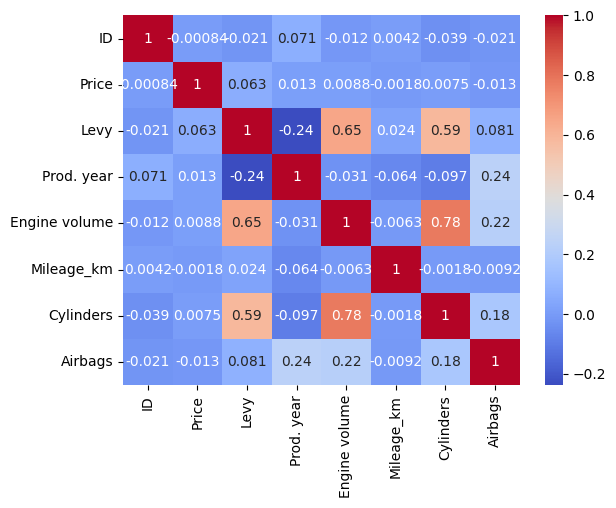

In [ ]:
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm", annot=True)

Del análisis de las correlaciones se puede observar que hay alguas variables que se relacionan en cierta medida:

*   El volumen del motor está fuertemente correlacionado (positivamente) a la cantidad de cilindros con un valor de correlación de 0,78.
*   Motores más grandes están correlacionados con impuestos más altos (Levy) con un valor de correlación de 0,65. Sucede algo similar con la variable cantidad de cilindros (como se mencionó antes las variables cilindros y volumen del motor están relacionadas).
*   Hay una leve correlación entre la cantidad de airbags con el año de producción y con el volumen del motor (así también con la cantidad de cilindros).

Se evidencia que las variables que se relacionan con el volumen del motor están también relacionadas con la cantidad de cilindros. Esto debe estar relacionado a la fuerte correlación entre las dos variables.



##**5. ANÁLISIS EXPLORATORIO DE DATOS (EDA)**

###**Análisis univariado de "Manufacturer"**

Del análisis de la variable Manufacturer se puede analizar que existen 65 empresas presentes en el dataset:



In [ ]:
len(set(df.Manufacturer))

65

Las 15 más repetidas son las siguientes:

In [ ]:
df.Manufacturer.value_counts().head(15)

,count
Manufacturer,
HYUNDAI,3769
TOYOTA,3662
MERCEDES-BENZ,2076
FORD,1111
CHEVROLET,1069
BMW,1049
LEXUS,982
HONDA,977
NISSAN,660


<Axes: xlabel='Manufacturer', ylabel='count'>

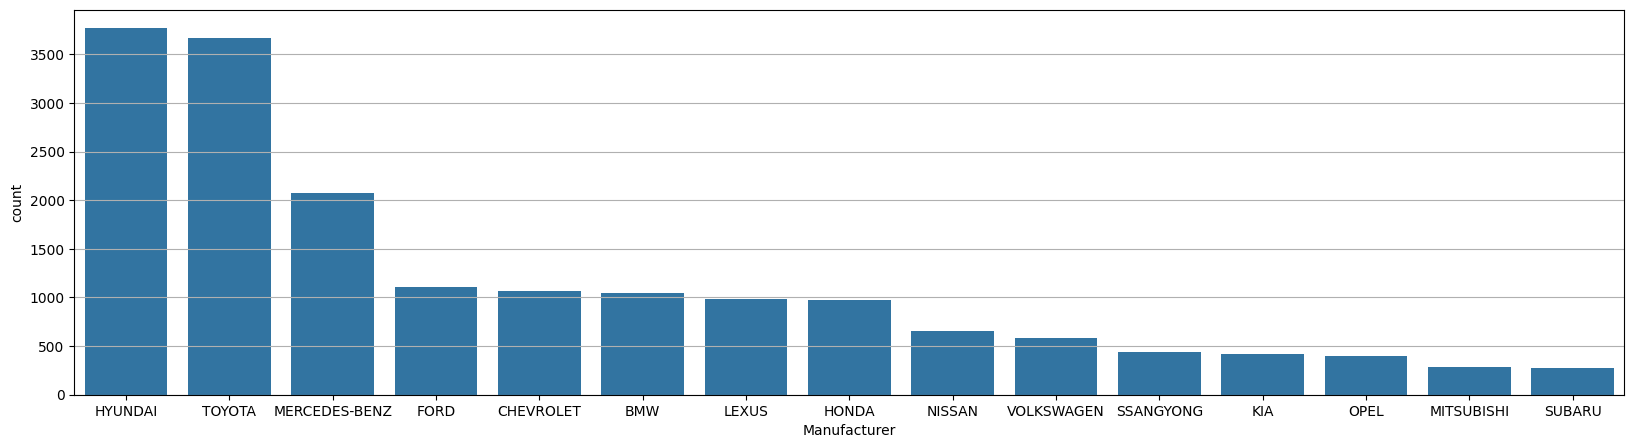

In [ ]:
plt.figure(figsize=(20, 5))
plt.grid(True)
sns.barplot(data=df.Manufacturer.value_counts().head(15))

El 92% de los registros está concentrado en estas 15 marcas principales:

In [ ]:
df.Manufacturer.value_counts().head(15).sum()/df.shape[0]

0.9230649269636638

Quizás sería posible evaluar si es mejor englobar las marcas que tengan menos de cierta cantidad de registros como "Otros", de esa forma se disminuiría un poco la cardinalidad de esta variable y pueda tener más utilidad en el análisis de regresión.

###**Análisis univariado de "Engine volume"**

In [ ]:
df["Engine volume"].value_counts().head(10)

,count
Engine volume,
2.0,4324
2.5,2370
1.8,1937
1.6,1578
1.5,1393
3.5,1270
3.0,1101
2.4,1037
1.3,536


<Axes: xlabel='Engine volume', ylabel='Count'>

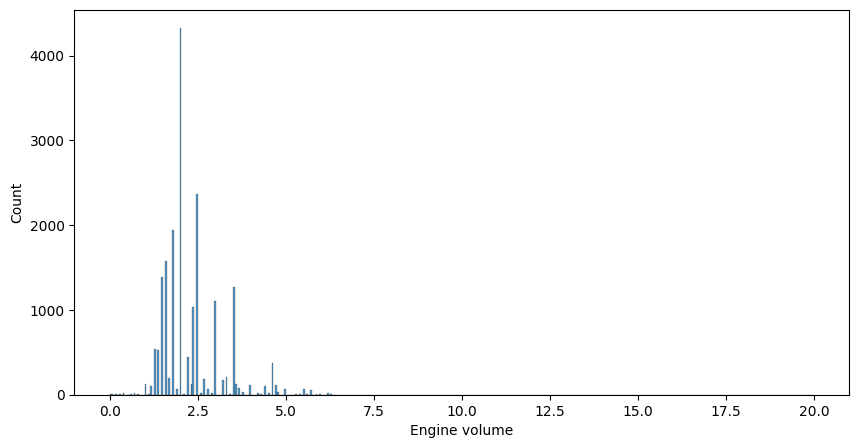

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df,x='Engine volume')

Del análisis del volumen del motor se encuentra que la mayoría de los autos se encuentran en los valores de 2.0 y 2.5.

###**Análisis univariado de "Model"**

Como era esperable, se puede observar que la cardinalidad de la variable del modelo del auto es mucho mayor: hay 1590 modelos diferentes.

In [ ]:
len(set(df.Model))

1590

En el top 50 se puede observar que hay gran cantidad de registros en los primeros modelos más repetidos (Prius, Sonata, Camry y Elantra). Luego las cantidades empiezan a disminuir significativamente.

In [ ]:
df.Model.value_counts().head(50)

,count
Model,
Prius,1083
Sonata,1079
Camry,938
Elantra,922
E 350,542
Santa FE,533
FIT,446
H1,437
Tucson,429


Utilizando los primeros 50 modelos se alcanza al 65% de los registros por lo que no va a ser muy útil utilizar esta variable como categorización debido a la alta cardinalidad.

In [ ]:
df.Model.value_counts().head(50).sum()/df.shape[0]

0.6560274471071373

###**Análisis univariado y bivariado de "Category"**

Del análisis de categoría de autos se puede observar que hay 11 categorías de las cuales las primeras 3 (Sedan, Jeep y Hatchback) ocupan el 88% de los registros.

In [ ]:
df.Category.value_counts()

,count
Category,
Sedan,8736
Jeep,5473
Hatchback,2847
Minivan,647
Coupe,532
Universal,364
Microbus,306
Goods wagon,233
Pickup,52


<Axes: xlabel='Category', ylabel='count'>

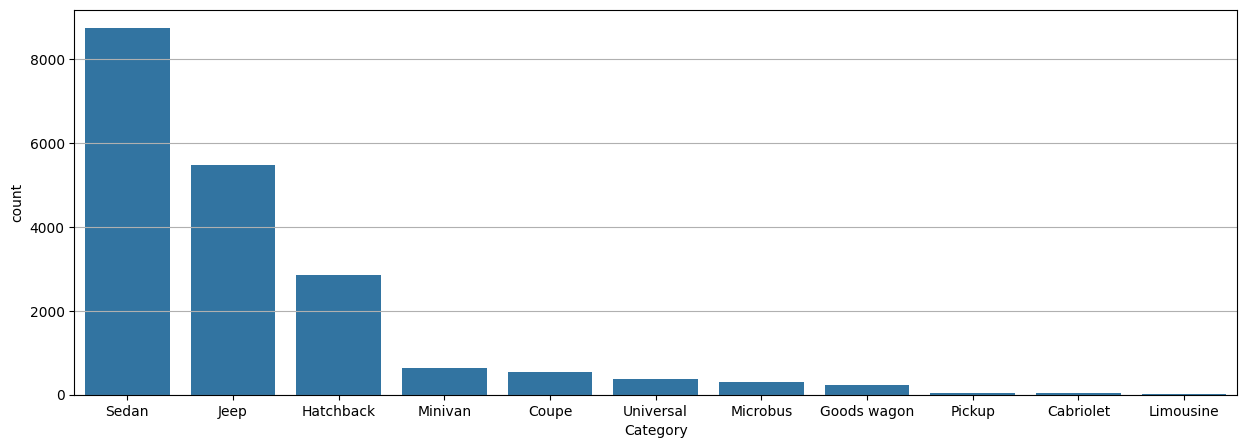

In [ ]:
plt.figure(figsize=(15, 5))
plt.grid(True)
sns.barplot(data=df.Category.value_counts())

In [ ]:
df.Category.value_counts().head(3).sum()/df.shape[0]

0.886624733586318

A continuación se muestra las distribuciones de los precios en función de la cateogría de auto:

(0.0, 100000.0)

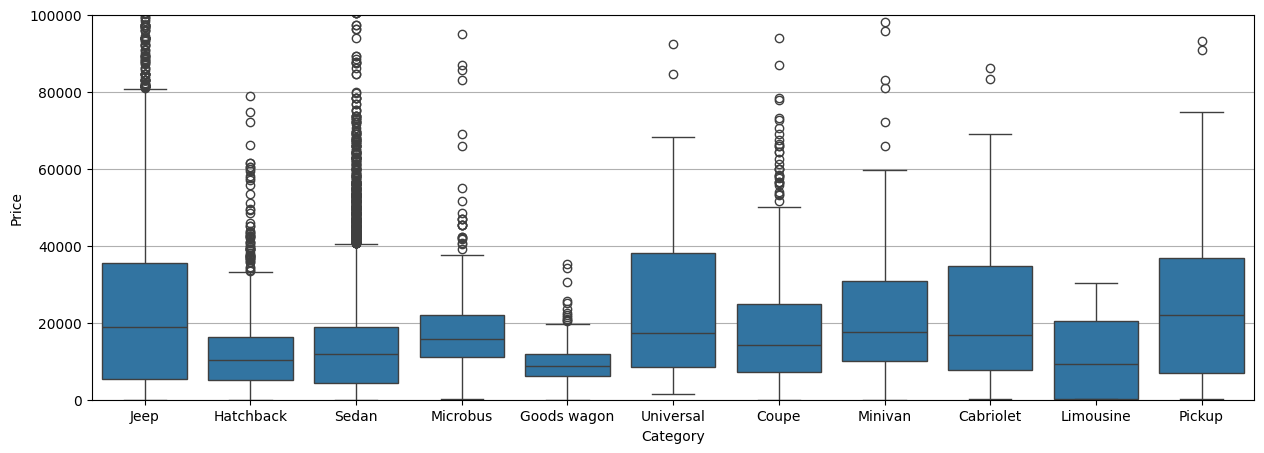

In [ ]:
plt.figure(figsize=(15, 5))
plt.grid(True)
sns.boxplot(data=df,x='Category',y='Price')
plt.ylim(0,100000)

###**Análisis univariado y bivariado de "Fuel Type"**

Analizando el tipo de combustible utilizado se puede observar que las categorías más importantes son las de Petrol (nafta), Diesel y Hybrid (híbrido).

In [ ]:
df["Fuel type"].value_counts()

,count
Fuel type,
Petrol,10150
Diesel,4036
Hybrid,3578
LPG,892
CNG,494
Plug-in Hybrid,86
Hydrogen,1


<Axes: xlabel='Fuel type', ylabel='count'>

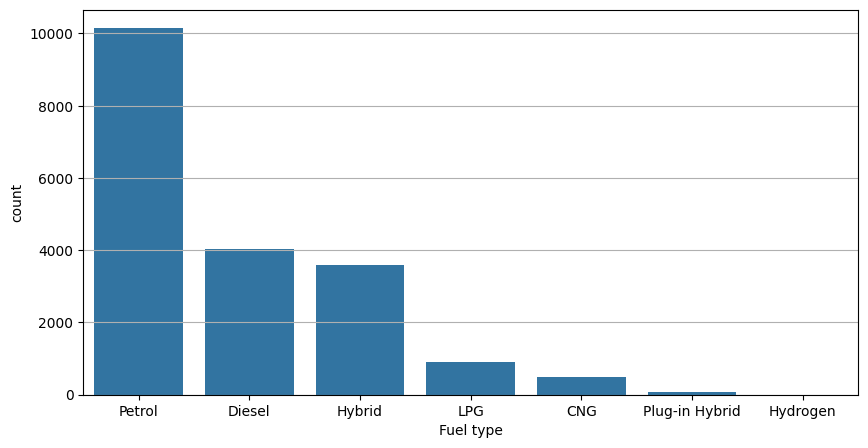

In [ ]:
plt.figure(figsize=(10, 5))
plt.grid(True)
sns.barplot(data=df["Fuel type"].value_counts())

Observando el precio se puede determinar que, de las tres categorías más importantes, los autos Diesel son más caros que los Petrol y los Hybrid son los más baratos (es posible que estén interactuando otras variables que promedien en aumento el precio de los Diesel/Petrol ya que se espera que el costo de un híbrido sea más alto).

(0.0, 100000.0)

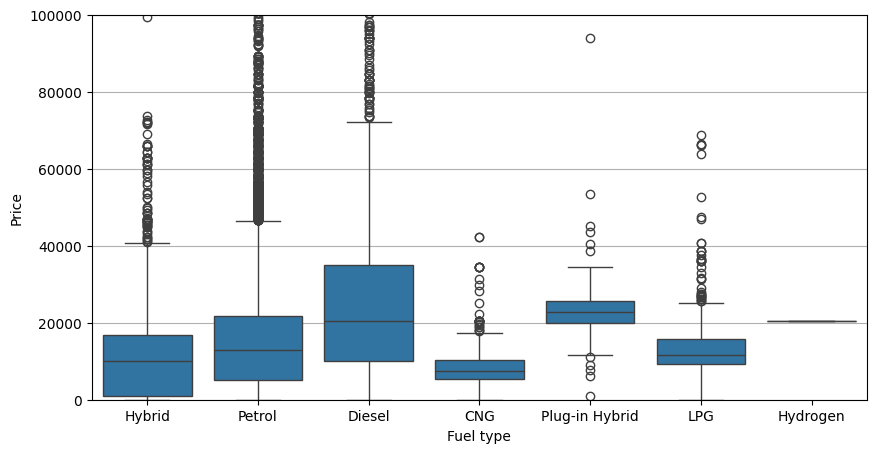

In [ ]:
plt.figure(figsize=(10, 5))
plt.grid(True)
sns.boxplot(data=df,x='Fuel type',y='Price')
plt.ylim(0,100000)

###**Hipótesis 1:** el interior de cuero aumenta el precio

<Axes: xlabel='Leather interior', ylabel='Price'>

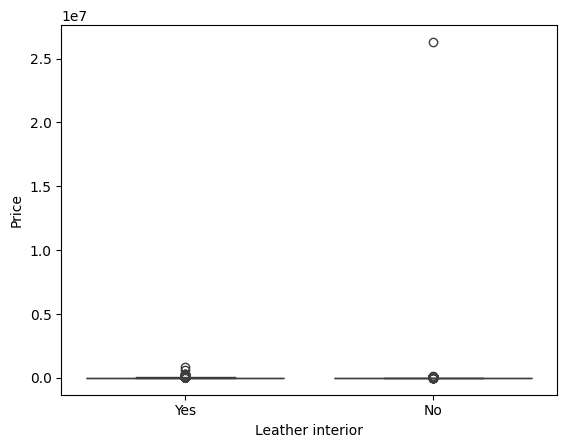

In [ ]:
sns.boxplot(data=df,x='Leather interior',y='Price')

Se disminuye el límite del eje de precio ya que hay valores ingresados muy elevados que no permiten visualizar correctamente el gráfico sacando de escala lo que se pretende analizar.

Text(0.5, 1.0, 'Gráfico 1: precio en función de interiores de cuero')

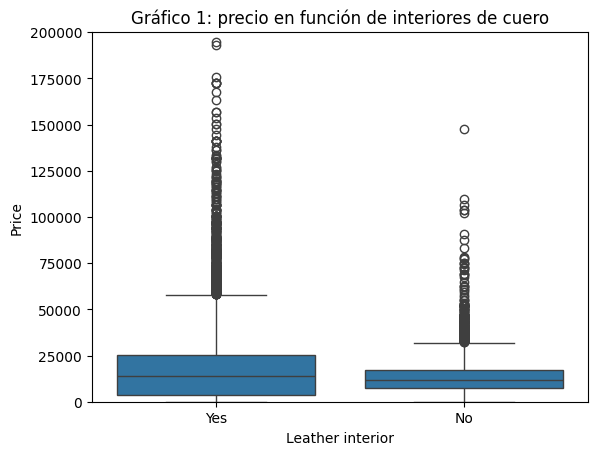

In [ ]:
sns.boxplot(data=df,x='Leather interior',y='Price')
plt.ylim(0,200000)
plt.title('Gráfico 1: precio en función de interiores de cuero')

In [ ]:
df.groupby('Leather interior')['Price'].mean()

,Price
Leather interior,
No,18322.323301
Yes,18644.369930


VERDADERO. Como se puede observar en el boxplot anterior el promedio de los precios, tanto para los autos con interior de cuero como los que no tienen, es bastante parecido, sin embargo, los autos más caros están predominantemente en la categoría que sí tienen interiores de cuero.

###**Hipótesis 2:** los autos con motor Turbo tienen un precio mayor que los que no lo son

Text(0.5, 1.0, 'Gráfico 2: precio en función del tipo de motor (Turbo)')

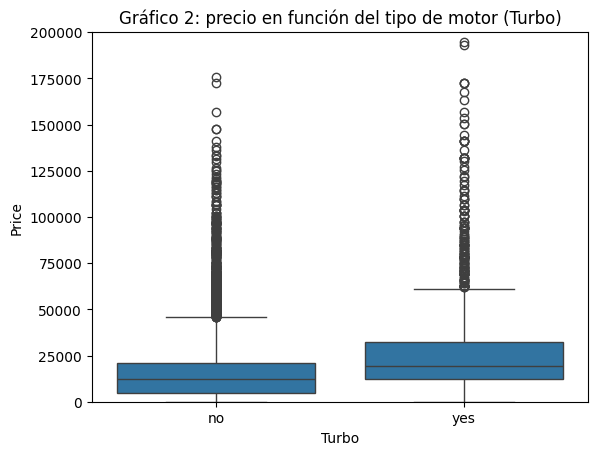

In [ ]:
sns.boxplot(data=df,x='Turbo',y='Price')
plt.ylim(0,200000)
plt.title('Gráfico 2: precio en función del tipo de motor (Turbo)')

In [ ]:
df.groupby('Turbo')['Price'].mean()

,Price
Turbo,
no,17449.613660
yes,28470.925945


VERDADERO. Es evidente que los que poseen un motor Turbo son en promedio más caro que los que no lo son para este dataset.

###**Hipótesis 3:** los autos manuales son más económicos que los autos automáticos

<Axes: xlabel='Gear box type', ylabel='Price'>

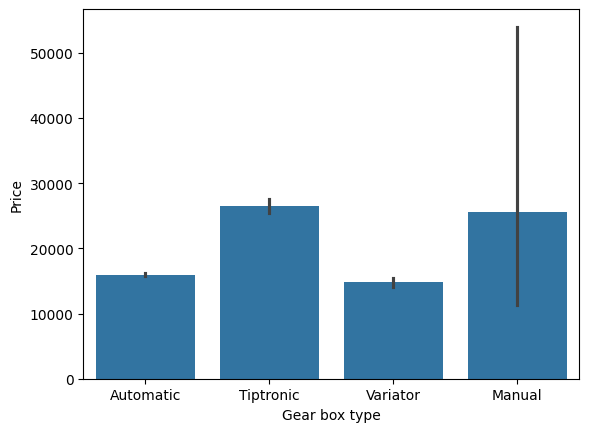

In [ ]:
sns.barplot(data=df,x='Gear box type',y='Price')

<Axes: xlabel='Gear box type', ylabel='Price'>

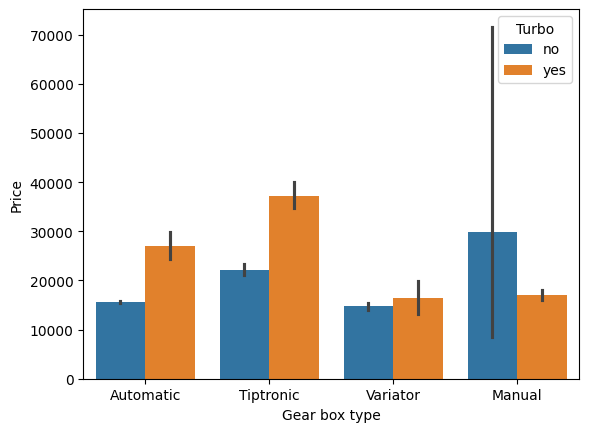

In [ ]:
sns.barplot(data=df,x='Gear box type',y='Price',hue='Turbo')

Pareciera ser que los autos manuales son más caros pero esto es debido a que hay un registro de un auto manual con un valor muy superior a los demás que le da a esta categoría más variabilidad que a las demás y un promedio mucho mayor. Para solucionar esto se crea un dataset auxiliar eliminando este registro.

In [ ]:
idmax = df.loc[df['Price'] == df.Price.max()].index[0]

In [ ]:
df.iloc[idmax]

,16983
ID,45812886
Price,26307500
Levy,NaN
Manufacturer,OPEL
Model,Combo
Prod. year,1999
Category,Goods wagon
Leather interior,No
Fuel type,Diesel
Engine volume,1.7


In [ ]:
df_sin_outlier = df.drop(idmax)

Text(0.5, 1.0, 'Gráfico 3a: precio en función del tipo de caja')

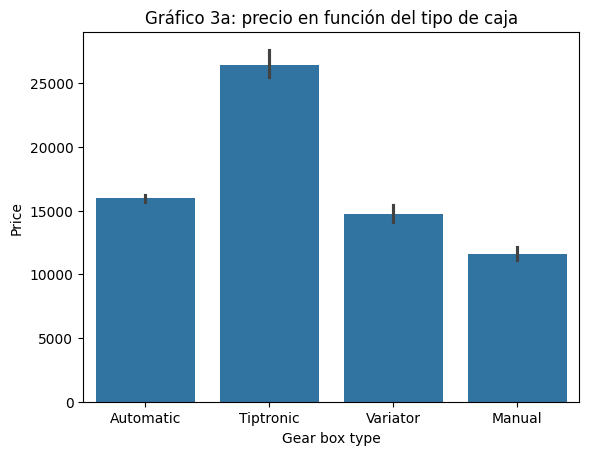

In [ ]:
sns.barplot(data=df_sin_outlier,x='Gear box type',y='Price')
plt.title('Gráfico 3a: precio en función del tipo de caja')

Text(0.5, 1.0, 'Gráfico 3b: precio en función del tipo de caja discriminado por tipo de motor')

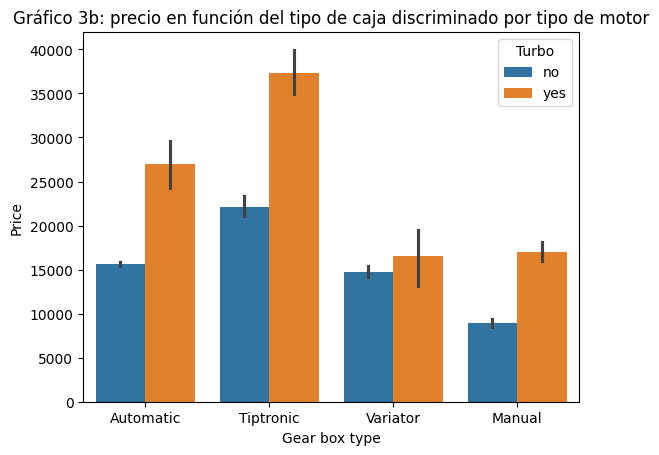

In [ ]:
sns.barplot(data=df_sin_outlier,x='Gear box type',y='Price',hue='Turbo')
plt.title('Gráfico 3b: precio en función del tipo de caja discriminado por tipo de motor')

In [ ]:
df_sin_outlier.groupby(['Gear box type','Turbo'])['Price'].mean()

Gear box type  Turbo
Automatic      no       15619.453747
               yes      26956.910165
Manual         no        8931.096825
               yes      17047.636808
Tiptronic      no       22137.158251
               yes      37265.194570
Variator       no       14738.921196
               yes      16490.400000
Name: Price, dtype: float64

VERDADERO. De los últimos dos gráficos (sin considerar el registro con el valor de precio más elevado) se puede observar que los autos manuales son los más baratos, le siguen los variator, luego los automáticos y por último los triptronic como los más caros.

###**Hipótesis 4:** los autos más nuevos tienen precios más elevados

Text(0.5, 1.0, 'Gráfico 4: precio en función del año de producción')

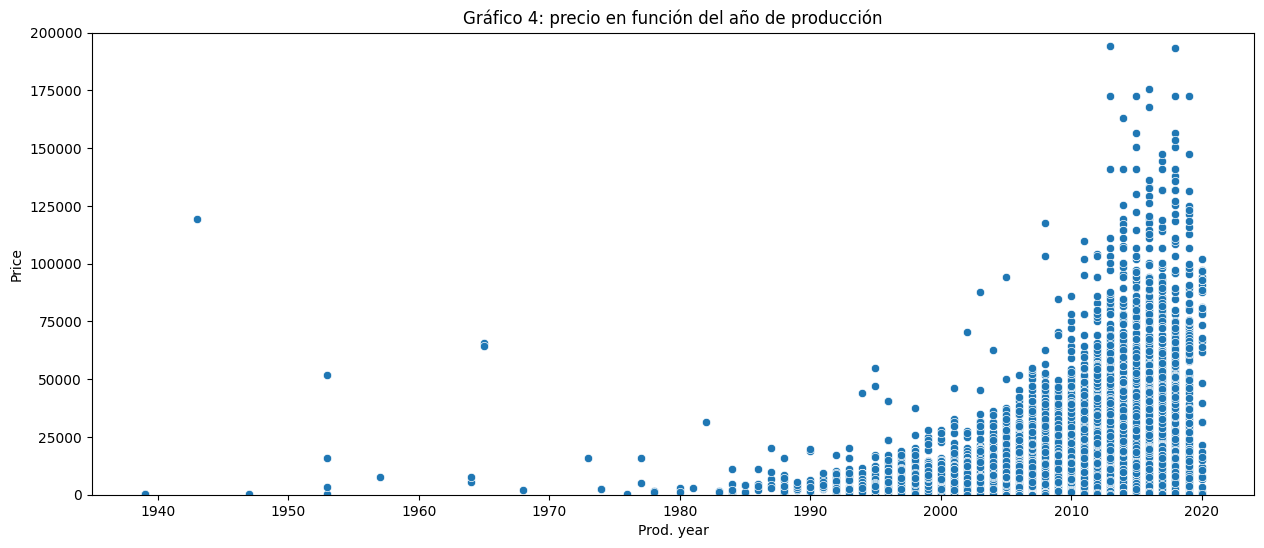

In [ ]:
plt.figure(figsize=(15, 6))
sns.scatterplot(data=df_sin_outlier,x='Prod. year',y='Price')
plt.ylim(0,200000)
plt.title('Gráfico 4: precio en función del año de producción')

In [ ]:
df_sin_outlier.groupby('Prod. year')['Price'].mean()

,Price
Prod. year,
1939,171.333333
1943,119172.000000
1947,150.000000
1953,17735.250000
1957,7527.000000
1964,6585.500000
1965,65074.000000
1968,2200.000000
1973,15681.000000


VERDADERO. A medida que aumenta el año de producción (el auto es más moderno) el precio aumenta. Es notable además que los autos más antiguos de 1980 son mucho menores en cantidad pero los precios son elevados lo que podría estar relacionado a autos de colección o muy bien conservados.

###**Hipótesis 5:** los autos con tracción de cuatro rueadas (4x4) son los más caros

Text(0.5, 1.0, 'Gráfico 5a: precio en función de tracción')

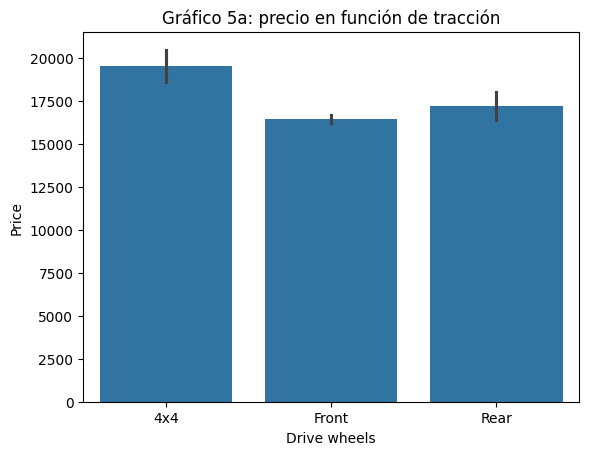

In [ ]:
sns.barplot(data=df_sin_outlier,x='Drive wheels',y='Price')
plt.title('Gráfico 5a: precio en función de tracción')

Text(0.5, 1.0, 'Gráfico 5b: precio en función de tracción discriminado por motor')

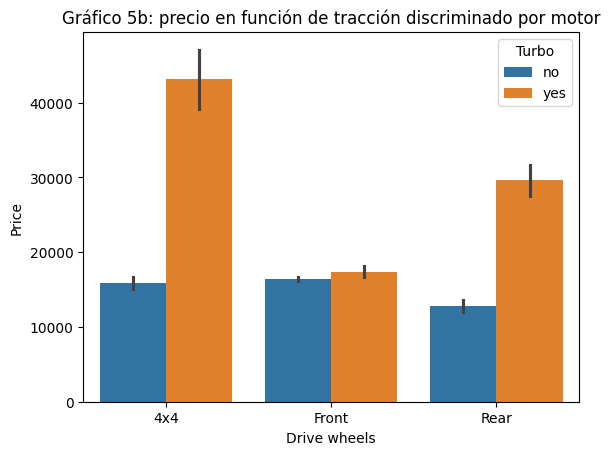

In [ ]:
sns.barplot(data=df_sin_outlier,x='Drive wheels',y='Price',hue='Turbo')
plt.title('Gráfico 5b: precio en función de tracción discriminado por motor')

In [ ]:
df_sin_outlier.groupby(['Drive wheels','Turbo'])['Price'].mean()

Drive wheels  Turbo
4x4           no       15860.872971
              yes      43121.069470
Front         no       16389.680314
              yes      17367.514687
Rear          no       12814.996479
              yes      29602.943428
Name: Price, dtype: float64

VERDADERO. Más allá de que la diferencia general no es tan evidente, el promedio de precio de los autos 4x4 es mayor a los de otras tracciones. Esta diferencia se hace más evidente cuando se discrimina por motores turbo (los autos 4x4 con motores turbo son en promedio bastante más caros que los otros tipos). Los autos con tracción delantera no parecen tener mucha diferencia entre los motores turbo o no. Los autos de tracción trasera son más económicos, igualmente la influencia del tipo de motor parece ser más relevante que el tipo de tracción.

###**Hipótesis 6:** los autos con colores poco usuales tienen precios más bajos

Text(0.5, 1.0, 'Gráfico 6: precio en función del color')

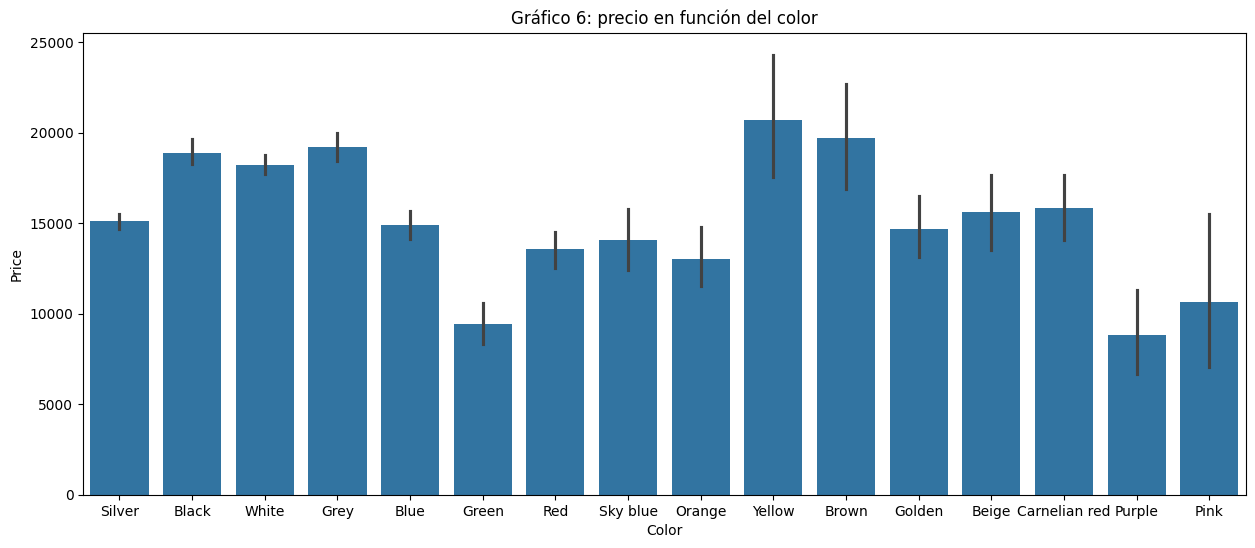

In [ ]:
plt.figure(figsize=(15, 6))
sns.barplot(data=df_sin_outlier,x='Color',y='Price')
plt.title('Gráfico 6: precio en función del color')

In [ ]:
df.Color.value_counts()

,count
Color,
Black,5033
White,4489
Silver,3792
Grey,2375
Blue,1396
Red,639
Green,322
Orange,253
Brown,187


In [ ]:
df_sin_outlier.groupby('Color')['Price'].mean()

,Price
Color,
Beige,15627.559701
Black,18886.917346
Blue,14892.604301
Brown,19709.636364
Carnelian red,15820.927374
Golden,14678.551724
Green,9449.677019
Grey,19203.448000
Orange,13008.422925


Se puede observar que los colores más "llamativos" o poco usuales (como el violeta o el rosa) tienen en promedio precios más bajos. Los colores más usuales (como el negro, blanco y plateado) tienen precios más elevados. Hay que destacar que el amarillo no cumple esta hipótesis.

Teniendo en cuenta lo analizado en esta sección se puede entender cuáles son las relaciones de algunas variables con el precio del auto (como son el interior de cuero, el tipo de motor Turbo, el tipo de caja, el año de producción, el tipo de tracción y en cierta medida el color del auto). Además se puede ver cierto comportamiento en variables como marca, modelo, categoría, tipo de combustible y volumen del motor que permiten tener más entendiemiento del dataset.

##**6. PREPROCESAMIENTO**

###**A. ANÁLISIS DE VALORES NULOS**

Primero se eliminan los valores duplicados (excluyendo el valor de ID):

In [ ]:
df_sin_duplicados = df_sin_outlier.drop('ID',axis=1).drop_duplicates()

Eliminación de los outliers de precio:

<Axes: xlabel='Price'>

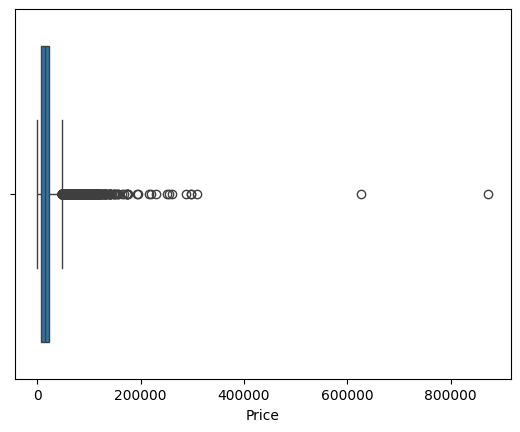

In [ ]:
sns.boxplot(df_sin_duplicados, x='Price')

In [ ]:
Q1 = np.percentile(df_sin_duplicados['Price'], 25)

In [ ]:
Q3 = np.percentile(df_sin_duplicados['Price'], 75)

In [ ]:
IQR = Q3 - Q1

In [ ]:
lower = Q1 - 1.5 * IQR

In [ ]:
upper = Q3 + 1.5 * IQR

In [ ]:
mask = (df_sin_duplicados['Price'] < lower) | (df_sin_duplicados['Price'] > upper)

In [ ]:
mask.sum()

956

In [ ]:
df_sin_duplicados = df_sin_duplicados[~mask]

In [ ]:
df_sin_duplicados.shape

(14768, 18)

Se elimina también la columna de modelo por ser una variable categórica con una muy alta cardinalidad.

In [ ]:
df_sin_duplicados = df_sin_duplicados.drop('Model',axis=1)

Se analizan los valores nulos por variable:

In [ ]:
df_sin_duplicados.isnull().sum()/df_sin_duplicados.shape[0]

,0
Price,0.000000
Levy,0.366671
Manufacturer,0.000000
Prod. year,0.000000
Category,0.000000
Leather interior,0.000000
Fuel type,0.000000
Engine volume,0.000000
Turbo,0.000000
Mileage_km,0.000000


<Axes: xlabel='Levy', ylabel='Count'>

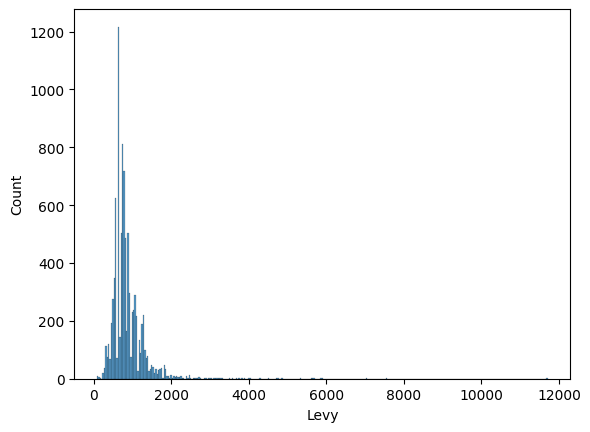

In [ ]:
sns.histplot(df_sin_duplicados,x='Levy')

Los valores nulos de esta columna están ingresados como "-" en el dataset original pero fueron modificados a nulos para poder hacer el análisis. No hay explicación si se deben a valores faltantes o si son autos sin impuestos. Se realizará una cross-validation con los cuatro casos (eliminando todos los registros con valores faltantes de Levy, llenando los valores con 0, llenando los valores con la mediana o eliminando la columna):

In [ ]:
Levy_median = df_sin_duplicados.Levy.median()

In [ ]:
Levy_median

770.0

####**I. Utilizando la mediana**

In [ ]:
df_Levy_median = df_sin_duplicados.copy()

In [ ]:
df_Levy_median['Levy']=df_Levy_median['Levy'].fillna(Levy_median)

In [ ]:
df_Levy_median.isnull().sum()/df_Levy_median.shape[0]

,0
Price,0.0
Levy,0.0
Manufacturer,0.0
Prod. year,0.0
Category,0.0
Leather interior,0.0
Fuel type,0.0
Engine volume,0.0
Turbo,0.0
Mileage_km,0.0


####**II. Utilizando el valor 0**

In [ ]:
df_Levy_cero = df_sin_duplicados.copy()

In [ ]:
df_Levy_cero['Levy']=df_Levy_cero['Levy'].fillna(0)

In [ ]:
df_Levy_cero.isnull().sum()/df_Levy_cero.shape[0]

,0
Price,0.0
Levy,0.0
Manufacturer,0.0
Prod. year,0.0
Category,0.0
Leather interior,0.0
Fuel type,0.0
Engine volume,0.0
Turbo,0.0
Mileage_km,0.0


####**III. Eliminando registros**

In [ ]:
df_sin_na = df_sin_duplicados.copy()

In [ ]:
df_sin_na = df_sin_na.dropna()

In [ ]:
df_sin_na.shape

(9353, 17)

In [ ]:
df_sin_na.isnull().sum()/df_sin_na.shape[0]

,0
Price,0.0
Levy,0.0
Manufacturer,0.0
Prod. year,0.0
Category,0.0
Leather interior,0.0
Fuel type,0.0
Engine volume,0.0
Turbo,0.0
Mileage_km,0.0


####**IV. Eliminando variable Levy**

In [ ]:
df_sin_Levy = df_sin_duplicados.copy()

In [ ]:
df_sin_Levy = df_sin_Levy.drop('Levy', axis=1)

In [ ]:
df_sin_Levy.isnull().sum()/df_sin_Levy.shape[0]

,0
Price,0.0
Manufacturer,0.0
Prod. year,0.0
Category,0.0
Leather interior,0.0
Fuel type,0.0
Engine volume,0.0
Turbo,0.0
Mileage_km,0.0
Cylinders,0.0


###**B. ENCODING DE VARIABLES CATEGÓRICAS**

Se procede a convertir las variables categóricas en dummies. Las variables afectadas serán las del tipo object: marca, categoría, interior de cuero, tipo de combustible, turbo, tipo de caja, volante, puertas y color.

In [ ]:
df_sin_duplicados.dtypes

,0
Price,int64
Levy,float64
Manufacturer,object
Prod. year,int64
Category,object
Leather interior,object
Fuel type,object
Engine volume,float64
Turbo,object
Mileage_km,int64


In [ ]:
df_Levy_median_dummies = pd.get_dummies(df_Levy_median, drop_first=True).copy()

In [ ]:
df_Levy_median_dummies.shape

(14768, 108)

In [ ]:
df_Levy_cero_dummies = pd.get_dummies(df_Levy_cero, drop_first=True).copy()

In [ ]:
df_Levy_cero_dummies.shape

(14768, 108)

In [ ]:
df_sin_na_dummies = pd.get_dummies(df_sin_na, drop_first=True).copy()

In [ ]:
df_sin_na_dummies.shape

(9353, 91)

In [ ]:
df_sin_Levy_dummies = pd.get_dummies(df_sin_Levy, drop_first=True).copy()

In [ ]:
df_sin_Levy_dummies.shape

(14768, 107)

###**C. SPLIT TRAIN/TEST**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [ ]:
cv5 = KFold(5)

In [ ]:
x_Levy_median = df_Levy_median_dummies.drop('Price',axis=1)

In [ ]:
x_Levy_cero = df_Levy_cero_dummies.drop('Price',axis=1)

In [ ]:
x_sin_na = df_sin_na_dummies.drop('Price',axis=1)

In [ ]:
x_sin_Levy = df_sin_Levy_dummies.drop('Price',axis=1)

In [ ]:
y_Levy_median = df_Levy_median_dummies.Price

In [ ]:
y_Levy_cero = df_Levy_cero_dummies.Price

In [ ]:
y_sin_na = df_sin_na_dummies.Price

In [ ]:
y_sin_Levy = df_sin_Levy_dummies.Price

In [ ]:
x_train_Levy_median, x_test_Levy_median, y_train_Levy_median, y_test_Levy_median = train_test_split(x_Levy_median,y_Levy_median,random_state=42)

In [ ]:
x_train_Levy_cero, x_test_Levy_cero, y_train_Levy_cero, y_test_Levy_cero = train_test_split(x_Levy_cero,y_Levy_cero,random_state=42)

In [ ]:
x_train_sin_na, x_test_sin_na, y_train_sin_na, y_test_sin_na = train_test_split(x_sin_na,y_sin_na,random_state=42)

In [ ]:
x_train_sin_Levy, x_test_sin_Levy, y_train_sin_Levy, y_test_sin_Levy = train_test_split(x_sin_Levy,y_sin_Levy,random_state=42)

## DATA STORYTELLING - Introducción y análisis de variables

La industria automotriz es un sector importante de la economía mundial contribuyendo con el 3,65% del PBI alcanzando el 10% del comercio mundial en 2019.

En los últimos 30 años la producción de vehículos ha estado en aumento como se puede observar en el siguiente gráfico en base a los datos obtenidos en https://www.bts.gov/content/world-motor-vehicle-production-selected-countries:

In [ ]:
# importación de librería
import plotly.express as px

#descarga de dataset
df_prod = pd.read_csv("https://raw.githubusercontent.com/jpolsak/datasets/main/cars_production_worlwide_historic.csv")

#listado de países con mayor contribución de produccción para filtrar el gráfico posteriormente
lista_paises = df_prod.groupby('country')['production'].sum().sort_values(ascending=False).head(8)
lista_paises = lista_paises.index.tolist()
lista_paises.append('Argentina')

#manipulación de dataset (conversión de la producción de miles de unidades a unidades reales, filtro de años y ordenamiento)
df_prod['prod_real']= df_prod['production'] * 1000
df_prod94 = df_prod[(df_prod.year>1993)&(df_prod.year<2020)].sort_values(by=['year','prod_real'],ascending=[True,True])
df_prod94_filt = df_prod94 = df_prod94[df_prod94['country'].isin(lista_paises)]
df_prod94_filt = df_prod94_filt.rename(columns={'year': 'Año'})

In [ ]:
#creación del gráfico de producción mundial en el tiempo
fig1= px.bar(df_prod94_filt,x='prod_real',y='country',animation_frame='Año',range_x=[0,1e8], color='prod_real', color_continuous_scale='Matter',color_continuous_midpoint=50000000)
fig1.update_layout(xaxis_title='Cantidad de vehículos producidos', yaxis_title='País', title='Evolución en el tiempo de la producción mundial de vehículos (1994-2020)')

Además de tener en cuenta la producción a nivel mundial y su comercio, existe un mercado de reventa que podría ser también interesante de analizar (en Argentina, solamente en 2023, se vendieron más de 1,5 millones de autos usados).

Para ambos actores sería útil contar con una herramienta de predicción de precios de acuerdo a las características de los autos (ya sea para la planificación de la producción en caso de las empresas manufactureras como para la reventa de los autos).

Para poder generar una herramienta de estas características se decide avanzar con el desarrollo de un proyecto de machine learning evaluando datos de más de 19 mil autos y sus precios.

Luego de la eliminación de valores atípicos, limpieza e imputación de valores nulos, se logró obtener un dataset útil para el entrenamiento del modelo con más de 14700 registros.

En este dataset se pueden analizar variables como el año de producción del vehículo, el fabricante, si tiene motor Turbo, interior de cuero, tipo de caja, combustible utilizado, entre otros parámetros.

Se puede observar que la variable Manufacturer (fabricante) tiene cierta influencia sobre el promedio de precio de los autos. A continuación se pueden observar los precios promedio de los 5 fabricantes más caros:

In [ ]:
#creación de serie auxiliar para la representación de los valores promedios de precio según el fabricante con posterior visualización
manufac = df_Levy_cero.groupby('Manufacturer')['Price'].mean().sort_values(ascending=False).head(5)
manufac = manufac.sort_values(ascending=True)
fig2 = px.bar(x=manufac.values,y=manufac.index,color=manufac.values,color_continuous_scale='Matter',color_continuous_midpoint=df_Levy_cero.Price.mean())
fig2.update_layout(xaxis_title='Precio promedio', yaxis_title='Fabricante', title='Autos con precio promedio más alto según el fabricante')

En el siguiente gráfico se puede observar que al aumentar la antigüedad de los autos el precio disminuye. Esto es evidente para el período 1983 a la actualidad, sin embargo, hay autos más antiguos que no siguen esta lógica. Esto puede deberse a que hay pocos registros para los autos antiguos, como se puede observar en el segundo gráfico, o porque los autos antiguos tiene un precio intrínseco diferente a los autos actuales.

In [ ]:
#análisis de precio según el año de manufatura
prodyear = df_Levy_cero.groupby('Prod. year')['Price'].mean()
prodyear
fig3 = px.bar(x=prodyear.index,y=prodyear.values,color=prodyear.values,color_continuous_scale='Matter',color_continuous_midpoint=df_Levy_cero.Price.mean())
fig3.update_layout(xaxis_title='Año de fabricación', yaxis_title='Precio promedio', title='Precio promedio de los autos de acuerdo a su año de fabricación')

In [ ]:
fig4 = px.histogram(df_Levy_cero['Prod. year'],color_discrete_sequence=['#D44C54'])
fig4.update_layout(xaxis_title='Año de fabricación', yaxis_title='Recuento de registros', title='Distribución de registros según el año de fabricación')

Analizando si el auto tiene interior de cuero o no y si el motor es Turbo se puede observar que generalmente estas características aumentan el valor del automóvil.

In [ ]:
fig5 = px.box(df_Levy_cero, x='Leather interior', y='Price', color='Turbo', color_discrete_sequence=['#D44C54', '#521652'])
fig5.update_layout(xaxis_title='Interior de cuero', yaxis_title='Precio', title='Influencia del motor turbo e interiores de cuero en el precio')

In [ ]:
#contador de autos por color y por año
cuenta = []
for i in range(len(df_Levy_cero.Color.unique())):
  for j in range(len(df_Levy_cero['Prod. year'].unique())):
    dfaux = df_Levy_cero[(df_Levy_cero.Color==df_Levy_cero.Color.unique()[i]) & (df_Levy_cero['Prod. year']==df_Levy_cero['Prod. year'].unique()[j])]
    cuenta.append([df_Levy_cero.Color.unique()[i],df_Levy_cero['Prod. year'].unique()[j],dfaux.shape[0]])

#creción de dataset auxiliar y ordenamiento
dfcolor = pd.DataFrame(cuenta)
dfcolor.columns = ['Color','Año','Cantidad']

dfcolor.Año.astype(int)
lista_colores = df_Levy_cero.Color.value_counts().index.tolist()
dfcolor['Color'] = pd.Categorical(dfcolor['Color'], categories=lista_colores, ordered=True)
dfcolor = dfcolor.sort_values(by=['Color','Año'])



Como se puede observar en el siguiente gráfico, los autos más comunes son los autos de color negro, gris y blanco. Los colores menos frecuentes, como el rosa y el púrpura tienen una mediana de precio menor a los demás colores.


In [ ]:
#visualización de autos por color a lo largo del tiempo
fig6 = px.scatter(dfcolor[(dfcolor.Año > 1990) & (dfcolor.Año < 2015)], x = "Color", y = "Cantidad",
           color="Cantidad", color_continuous_scale='Matter', color_continuous_midpoint=dfcolor.Cantidad.max()*0.55,
           animation_frame = "Año", size = 'Cantidad', range_y=[0,dfcolor.Cantidad.max()*1.1])
fig6.update_layout(xaxis_title='Color del automóvil', yaxis_title='Cantidad', title='Cantidad de autos por color a lo largo del tiempo (fecha de fabricación)')

In [ ]:
df_Levy_cero['Color'] = pd.Categorical(df_Levy_cero['Color'], categories=lista_colores, ordered=True)
fig7 = px.box(df_Levy_cero.sort_values(by='Color'), x='Color', y='Price',color_discrete_sequence=['#521652'])
fig7.update_layout(xaxis_title='Color del automóvil', yaxis_title='Precio', title='Distribución del precio del auto según el color')

Del siguiente gráfico se puede inferir el impacto que tiene el tipo de caja sobre el precio del auto. En rasgos generales se puede inferir que en promedio los autos manuales son más económicos.

In [ ]:
fig8 = px.box(df_Levy_cero, x='Gear box type', y='Price', color='Turbo', color_discrete_sequence=['#D44C54', '#521652'])
fig8.update_layout(xaxis_title='Tipo de caja', yaxis_title='Precio', title='Influencia del tipo de caja en el precio')

Fue necesario realizar el encoding de las variables categóricas lo que generó la mulplicación de las variables, pasando de 17 a 108:

In [ ]:
df_Levy_cero.shape

(14768, 17)

In [ ]:
df_Levy_cero_dummies.shape

(14768, 108)

##**7. MODELADO**

Como siguientes pasos del proyecto se puede mencionar la utilización de diferentes modelos de regresión para alcanzar una performance mayor.

###**A. CROSS-VALIDATION: DECISIÓN SOBRE COLUMNA LEVY**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [ ]:
modelo_1 = LinearRegression()
modelo_2 = LinearRegression()
modelo_3 = LinearRegression()
modelo_4 = LinearRegression()

In [ ]:
cross_val_score(modelo_1,x_train_Levy_median,y_train_Levy_median, cv=cv5).mean()

0.3631480264784718

In [ ]:
cross_val_score(modelo_2,x_train_Levy_cero,y_train_Levy_cero, cv=cv5).mean()

0.37118210718558264

In [ ]:
cross_val_score(modelo_3,x_train_sin_na,y_train_sin_na, cv=cv5).mean()

0.4021642320957725

In [ ]:
cross_val_score(modelo_4,x_train_sin_Levy,y_train_sin_Levy, cv=cv5).mean()

0.3606303269485272

Más allá de que los valores de R2 no son muy diferentes, se procede con el caso que posee un R2 levemente superior: eliminar los registros sin valores.

In [ ]:
x_train = x_train_sin_na
x_test = x_test_sin_na
y_train = y_train_sin_na
y_test = y_test_sin_na
df_dummies = df_sin_na_dummies

###**B. FEATURE SELECTION**

Para la reducción de dimensionalidad se procede a utilizar un método de feature selection del tipo forward. Se prueba utlizar solamente 7 variables y se compara con la utlización de todas las variables (sin feature selection).

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

####**I. 7 variables**

In [ ]:
sfs7 = SFS(LinearRegression(), k_features=7, cv=cv5)

In [ ]:
sfs7.fit(x_train, y_train)

SequentialFeatureSelector(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                          estimator=LinearRegression(), k_features=(7, 7),
                          scoring='r2')

In [ ]:
list(sfs7.k_feature_names_)

['Prod. year',
 'Airbags',
 'Manufacturer_HYUNDAI',
 'Manufacturer_SSANGYONG',
 'Category_Jeep',
 'Fuel type_Diesel',
 'Gear box type_Tiptronic']

In [ ]:
x_train_7 = x_train[list(sfs7.k_feature_names_)]

In [ ]:
x_test_7 = x_test[list(sfs7.k_feature_names_)]

In [ ]:
modelo_7_variables = LinearRegression()

In [ ]:
cross_val_score(modelo_7_variables, x_train_7, y_train, cv=cv5)

array([0.31352412, 0.33388344, 0.31215998, 0.32754563, 0.3217526 ])

In [ ]:
cross_val_score(modelo_7_variables, x_train_7, y_train, cv=cv5).mean()

0.3217731546599626

####**II. Sin feature selection**

In [ ]:
modelo_todas = LinearRegression()

In [ ]:
cross_val_score(modelo_todas, x_train, y_train, cv=cv5)

array([0.40583042, 0.41994754, 0.37532229, 0.41482207, 0.39489884])

In [ ]:
cross_val_score(modelo_todas, x_train, y_train, cv=cv5).mean()

0.4021642320957725

Con las principales 7 variables elegidas por el feautre selection se llega a un R2 de 0,32 y utilizando todas se alcanza un 0,4. El R2 máximo obtenido no es satisfactorio completamente pero se puede destacar que la cantidad de variables se disminuye drásticamente (de más de 100 a solamente 7) mantiendo el R2 en el rango 0,3-0,4.

####**III. PCA (Principal Component Analysis)**

Se analiza el dataset con el método de PCA para poder evaluar si es posible combinar variables númericas para reducir la dimensionalidad.

In [ ]:
#Se importan las librerías necesarias
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
#Filtro de variables numéricas
df_sin_na_num = df_sin_na[df_sin_na.columns[df_sin_na.dtypes == 'int64']]
df_sin_na_num

,Price,Prod. year,Mileage_km,Cylinders,Airbags
0,13328,2010,186005,6,12
1,16621,2011,192000,6,8
3,3607,2011,168966,4,0
4,11726,2014,91901,4,4
5,39493,2016,160931,4,4
...,...,...,...,...,...
19225,8781,2007,236000,4,4
19230,470,2011,307325,4,12
19233,15681,2011,161600,4,8
19234,26108,2010,116365,4,4


<Axes: >

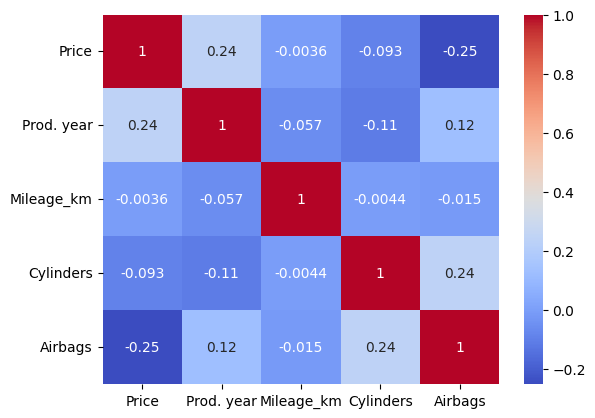

In [ ]:
#Visualización de correlaciones
sns.heatmap(df_sin_na_num.corr(numeric_only=True), cmap="coolwarm", annot=True)

In [ ]:
#Normalización de las variables para poder ser utilizadas en PCA
scaler = StandardScaler()
df_sin_na_num_std = pd.DataFrame(scaler.fit_transform(df_sin_na_num))
df_sin_na_num_std.columns = df_sin_na_num.columns
df_PCA=df_sin_na_num_std
df_PCA

,Price,Prod. year,Mileage_km,Cylinders,Airbags
0,-0.229800,-0.970611,-0.011490,1.837614,1.208681
1,0.050950,-0.645358,-0.011245,1.837614,0.242913
2,-1.058577,-0.645358,-0.012186,-0.343918,-1.688623
3,-0.366380,0.330399,-0.015333,-0.343918,-0.722855
4,2.000933,0.980904,-0.012514,-0.343918,-0.722855
...,...,...,...,...,...
9348,-0.617460,-1.946369,-0.009449,-0.343918,-0.722855
9349,-1.326026,-0.645358,-0.006537,-0.343918,1.208681
9350,-0.029191,-0.645358,-0.012487,-0.343918,0.242913
9351,0.859777,-0.970611,-0.014334,-0.343918,-0.722855


In [ ]:
#Utilización del modelo
pca_1 = PCA()
df_PCA_transformado = pd.DataFrame(pca_1.fit_transform(df_PCA))

In [ ]:
#Dataframe transformado con PCA
df_PCA_transformado

,0,1,2,3,4
0,2.019220,-0.156340,0.122162,1.210323,0.501262
1,1.230112,0.049174,0.069360,1.525257,-0.090700
2,-0.252866,1.633788,-0.655193,-0.330525,-1.111404
3,-0.447593,0.258490,-0.158488,-0.361921,-0.679095
4,-2.062880,-0.717483,0.365522,0.806309,0.229924
...,...,...,...,...,...
9348,0.407082,2.002974,-0.704539,-0.065718,0.363568
9349,1.469303,0.175030,-0.180357,-1.147940,0.462907
9350,0.173782,0.407945,-0.151087,-0.215825,0.573372
9351,-0.777369,0.968764,-0.255704,0.555254,0.637031


In [ ]:
#Distribución de la variabilidad
varianza = pca_1.explained_variance_ratio_
varianza

array([0.28610584, 0.23142374, 0.19651926, 0.17832422, 0.10762694])

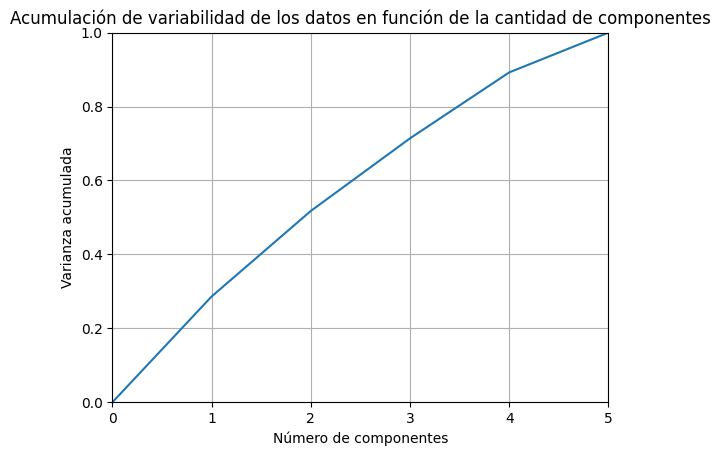

In [ ]:
j = 0
varianza_acumulada = [[0,0]]
for i in range(0,len(varianza)):
  j=j+varianza[i]
  varianza_acumulada.append([i+1,j])
df_aux = pd.DataFrame(varianza_acumulada)
df_aux.columns = ['Número de componentes','Varianza acumulada']
sns.lineplot(data=df_aux,x='Número de componentes',y='Varianza acumulada')
plt.xlim(0,df_aux['Número de componentes'].max())
plt.ylim(0,1)
plt.xticks(range(int(df_aux['Número de componentes'].min()), int(df_aux['Número de componentes'].max()) + 1))
plt.title('Acumulación de variabilidad de los datos en función de la cantidad de componentes')
plt.grid(True)

In [ ]:
#Loadings del modelo
pca_loadings = pd.DataFrame(pca_1.components_.T, index=df_PCA.columns)
pca_loadings.rename(columns = {0 : 'CP1', 1 : 'CP2', 2 : 'CP3', 3 : 'CP4', 4 : 'CP5'}, inplace = True)
pca_loadings.T

,Price,Prod. year,Mileage_km,Cylinders,Airbags
CP1,-0.597320,-0.309460,0.022350,0.506146,0.539222
CP2,-0.208671,-0.742354,0.326787,-0.156978,-0.523387
CP3,0.158463,0.224791,0.940306,0.094695,0.176683
CP4,0.545931,-0.190513,-0.081303,0.778092,-0.231576
CP5,0.525846,-0.516061,-0.043884,-0.323699,0.591997


In [ ]:
varianza_acumulada[2][1]

0.5175295769831445

El modelo de PCA logra explicar el 52% de la variabilidad usando 2 de las 5 variables.

Text(0.5, 1.0, 'Primeros componentes principales en función de variables originales')

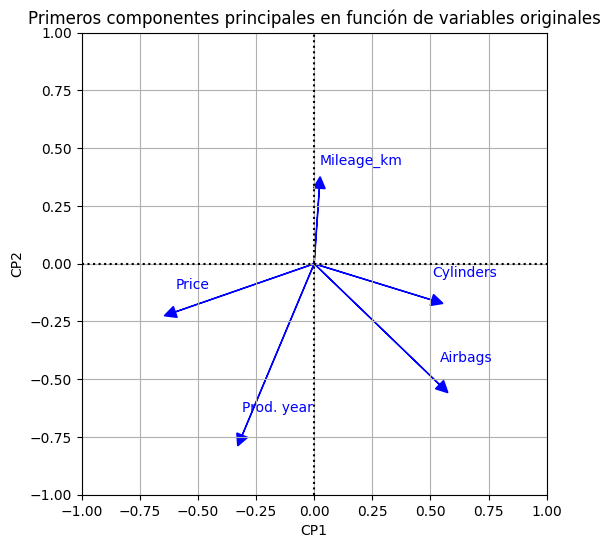

In [ ]:
fig , ax1 = plt.subplots(figsize=(6,6)); ax1.set_xlim(-1,1); ax1.set_ylim(-1,1)

# Ploteamos las líneas de referencia
ax1.hlines(0,-1,1, linestyles='dotted', colors='black');
ax1.vlines(0,-1,1, linestyles='dotted', colors='black');
ax1.set_xlabel('CP1');ax1.set_ylabel('CP2')

# Ploteamos a las variables originales en relación a los Componentes Principales 1 y 2
for i in pca_loadings[['CP1', 'CP2']].index:
    ax1.annotate(i, (pca_loadings.CP1.loc[i], pca_loadings.CP2.loc[i]), color='blue', xytext=(pca_loadings.CP1.loc[i], pca_loadings.CP2.loc[i]+0.1))

# Plot vectors
for idx in range(pca_loadings.shape[0]):
    ax1.arrow(
        0, 0,
        pca_loadings.iloc[idx, 0],  # CP1
        pca_loadings.iloc[idx, 1],  # CP2
        head_width=0.05,
        head_length=0.05,
        fc='blue',
        ec='blue'
    )

plt.grid(True)
plt.title('Primeros componentes principales en función de variables originales')

Mediante la utilización de PCA es posible encontrar combinaciones lineales de las variables numéricas que contengan la mayor cantidad de variabilidad posible. En el caso de este dataset solamente hay 5 variables numéricas que permiten utilizar este método. Como la correlación de las variables no es tan fuerte, no es posible generar una disminución importante de variables manteniendo un alto porcentaje de variabilidad explicada, sin embargo, es posible explicar el 52% de la variabilidad con dos componentes principales.

###**C. PIPELINE DE PRE-PROCESAMIENTO**

A continuación se elabora el pipeline con todos las acciones de pre-procesamiento de los datos.

In [ ]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# Definición de la función de eliminación de duplicados
def remover_duplicados(df):
  df_sin_duplicados = df_sin_outlier.drop('ID',axis=1).drop_duplicates()
  return df_sin_duplicados

# Definición del transformador de eliminación de duplicados
transformador_remover_duplicados = FunctionTransformer(remover_duplicados)

In [ ]:
# Definición de la función de eliminación de outliers sobre la variable precio con el método de IQR
def remover_outliers(df):
  Q1 = np.percentile(df['Price'], 25)
  Q3 = np.percentile(df['Price'], 75)
  IQR = Q3 - Q1
  lower = Q1 - 1.5 * IQR
  upper = Q3 + 1.5 * IQR
  mask = (df['Price'] < lower) | (df['Price'] > upper)
  df_sin_outliers = df[~mask]
  return df_sin_outliers

# Definición del transformador de eliminación de outliers
transformador_remover_outliers = FunctionTransformer(remover_outliers)

In [ ]:
# Definición de la función de eliminación de la variable Modelo por tener muy alta cardinalidad y la variable ID
def remover_var(df):
  df_remover_var = df.drop(['Model','ID'],axis=1,errors='ignore')
  return df_remover_var

# Definición del transformador de eliminación de variables
transformador_remover_variables = FunctionTransformer(remover_var)

In [ ]:
# Definición de la función de eliminación de registros sin datos de Levy
def imputar_nulos(df):
  df_sin_na = df.copy()
  df_sin_na = df_sin_na.dropna()
  return df_sin_na

# Definición del transformador de imputar nulos
transformador_imputación = FunctionTransformer(imputar_nulos)

In [ ]:
# Definición de la función de separación x-y
def sep_x_y(df):
  x_inicial = df.drop('Price',axis=1)
  y = df.Price
  return x_inicial,y

# Definición del transformador de separación x-y
transformador_sep_x_y = FunctionTransformer(sep_x_y)

In [ ]:
# Definición del transformador para el encoding de variables categóricas y standard scaler de variables numéricas
transformador_enc_sc = make_column_transformer(
      (StandardScaler(),
       make_column_selector(dtype_include=np.number)),
      (OneHotEncoder(sparse_output=False),
       make_column_selector(dtype_include=object)))

# Definición de función de encoding
def encoding(x):
  # Transformación del dataset con One Hot Enconding y Standard Scaler
  x = transformador_enc_sc.fit_transform(x_inicial)
  # Obtener los nombres de las columnas numéricas originales
  numerical_columns = x_inicial.select_dtypes(include=[np.number]).columns
  # Obtener los nombres de las columnas categóricas codificadas
  encoder = transformador_enc_sc.named_transformers_['onehotencoder']
  encoded_categorical_columns = encoder.get_feature_names_out(x_inicial.select_dtypes(include=[object]).columns)
  # Combinar los nombres de las columnas
  all_columns = np.concatenate([numerical_columns,encoded_categorical_columns])
  # Crear un DataFrame con los datos transformados y los nombres de las columnas
  x_preprocesado = pd.DataFrame(x, columns=all_columns)
  return x_preprocesado

# Definición del transformador de encoding
transformador_encoding = FunctionTransformer(encoding)

In [ ]:
# Creación del pipeline
pipeline_preprocesamiento_1 = Pipeline(steps=[('Remover duplicados',transformador_remover_duplicados),
                                            ('Eliminación de outliers',transformador_remover_outliers),
                                            ('Eliminación de variables',transformador_remover_variables),
                                            ('Imputación de Levy',transformador_imputación),
                                            ('Separación x-y',transformador_sep_x_y)])

pipeline_preprocesamiento_2 = Pipeline(steps=[('Encoding',transformador_encoding)])

In [ ]:
# Preprocesamiento
x_inicial,y = pipeline_preprocesamiento_1.fit_transform(df)
x = pipeline_preprocesamiento_2.fit_transform(x_inicial)
x = x.reset_index(drop=True)
y = y.reset_index(drop=True)

In [ ]:
x_train_f, x_test_f, y_train_f, y_test_f = train_test_split(x,y,random_state=42)

###**D. VALIDACIÓN DEL MODELO**

Utilizando todas las variables se llega al siguiente R2:

In [ ]:
modelo_todo = LinearRegression()

In [ ]:
modelo_todo.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred_todo = modelo_todo.predict(x_test)

In [ ]:
r2_score(y_test, y_pred_todo)

0.43300242085085794

Al utilizar solamente 7 variables se llega a un R2 positivo y cercano al alacanzado en el entrenamiento del modelo:

In [ ]:
modelo = LinearRegression()

In [ ]:
modelo.fit(x_train_7, y_train)

LinearRegression()

In [ ]:
y_pred = modelo.predict(x_test_7)

In [ ]:
r2_score(y_test, y_pred)

0.34181203983397546

\Más allá que el R2 alcanzado con 7 variables (0,34) es menor que el alcanzado con la utilización de todas (cerano al 0,43) se puede demostrar una gran reducción de las variables a utilizar manteniendo la mayoría del poder de predicción (se disminuyó desde más de 100 variables a solamente 7). Sería posible utilizar otros algoritmos y/u otras estrategias de acondicionamiento de datos para comprobar si es posible alcanzar valores más elevados .

A continuación se analizan el valor del MSE y los residuos para evaluar la aplicabilidad de la regresión lineal:

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
MSE = mean_squared_error(y_test,y_pred)
MSE

90766418.1765133

In [ ]:
np.sqrt(MSE)

9527.141133441517

El valor de la raíz del MSE infiere en unidades de la variable target (valor del precio del auto) en cuanto se desvía entre lo que se predice y el valor verdadero. Este valor es bastante elevado por lo que será necesario mejorar el modelo para reducir este valor.

Del análisis de los residuos se obtiene la siguiente información:

In [ ]:
error = y_pred - y_test

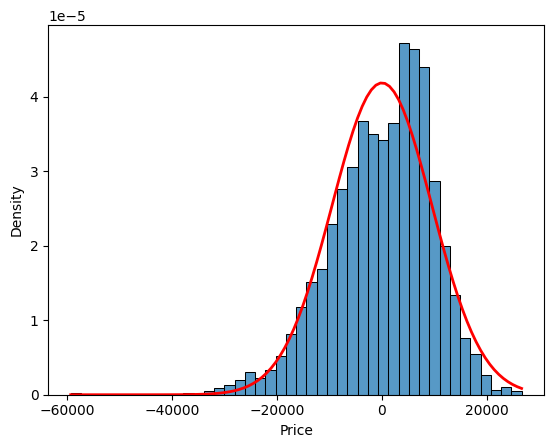

In [ ]:
from scipy.stats import norm
sns.histplot(x=error,stat='density')
mean = error.mean()
std = error.std()
x = np.linspace(error.min(), error.max(), 100)
p = norm.pdf(x, mean, std)
plt.plot(x, p, 'r', linewidth=2)

In [ ]:
error.describe()

,Price
count,2339.000000
mean,13.160179
std,9529.169280
min,-59352.873002
25%,-6012.979325
50%,1161.244125
75%,6959.088404
max,26638.654708


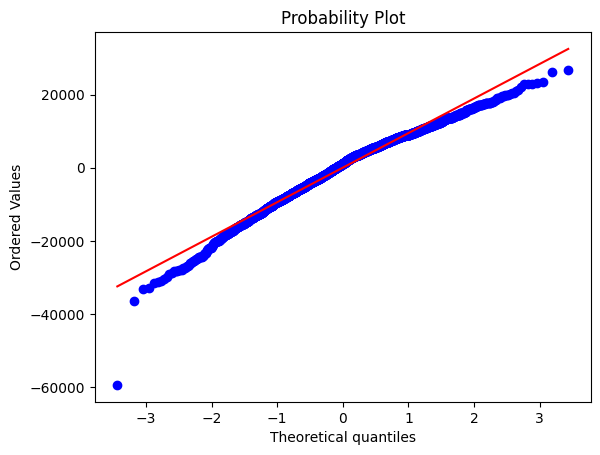

In [ ]:
import scipy.stats as stats
stats.probplot(error, dist="norm", plot=plt)
plt.show()

En aspectos generales la distribución de errores tiende a un comportamiento normal. La media está muy cercana al valor 0, sin embargo, la mediana tiene cierta desviación positiva que se observa con el corrimiento de la distribución hacia la derecha con respecto a la normal.

###**E. Evaluación de otros modelos - Árbol de decisión**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
R2 = []
for i in range (2,500):
  tree = DecisionTreeRegressor(max_leaf_nodes=i)
  j = cross_val_score(tree, x_train, y_train, cv=cv5)
  R2.append([i,np.mean(j)])

Text(0.5, 1.0, 'Performance del modelo de árbol de decisión')

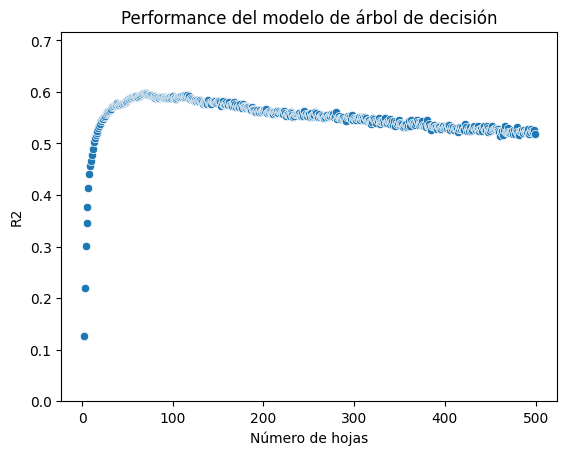

In [ ]:
df_R2_arbol = pd.DataFrame(R2)
df_R2_arbol.columns = ['Hojas','R2']
sns.scatterplot(data=df_R2_arbol,x='Hojas',y='R2')
plt.ylim(0,max(df_R2_arbol['R2']*1.2))
plt.xlabel('Número de hojas')
plt.ylabel('R2')
plt.title('Performance del modelo de árbol de decisión')

In [ ]:
Hojas_optimas = df_R2_arbol[df_R2_arbol['R2']==max(df_R2_arbol['R2'])]
Hojas_optimas

,Hojas,R2
66,68,0.597516


In [ ]:
tree_f = DecisionTreeRegressor(max_leaf_nodes=Hojas_optimas['Hojas'].values[0])
tree_f.fit(x_train, y_train)
r2_score(tree_f.predict(x_test),y_test)

0.48031895539207536

Utilizando el algoritmo de árbol de decisión y evaluándolo con cross-validation para una cantidad de hojas entre 2 y 500 se encontró un máximo de R2 de 0,59 con aproximadamente 100 hojas (superando a la regresión lineal). Sin embargo, cuando se valida el modelo con los datos de testeo se consigue un R2 de 0,48 (más cercano al ya obtenido con regresión lineal pero un poco superior).

###**F. Análisis de bias-variance**

In [ ]:
from mlxtend.evaluate import bias_variance_decomp

Evaluación del bias y de la varianza para el modelo de regresión lineal:

In [ ]:
mse_modelo, bias_modelo, var_modelo = bias_variance_decomp(modelo, np.array(x_train), np.array(y_train), np.array(x_test), np.array(y_test), loss='mse', num_rounds=50, random_seed=1)
print('MSE: %.3e' % mse_modelo)
print('Bias: %.3e' % bias_modelo)
print('Variance: %.3e' % var_modelo)

MSE: 7.901e+07
Bias: 7.794e+07
Variance: 1.066e+06


Evaluación del bias y de la variance para el modelo de árbol de decisión:

In [ ]:
mse_tree_f, bias_tree_f, var_tree_f = bias_variance_decomp(tree_f, np.array(x_train), np.array(y_train), np.array(x_test), np.array(y_test), loss='mse', num_rounds=50, random_seed=1)
print('MSE: %.3e' % mse_tree_f)
print('Bias: %.3e' % bias_tree_f)
print('Variance: %.3e' % var_tree_f)

MSE: 5.646e+07
Bias: 4.623e+07
Variance: 1.024e+07


Como se puede observar en los valores de bias y de varianza obtenidos, el modelo de regresión lineal utilizando todas las variables tiene un bias mayor al árbol de decisión y una varianza menor. Esto puede explicarse ya que el modelo de regresión lineal es un modelo más simple que no logra explicar la variación de los datos perfectamente. Es posible decir que el modelo de regresión lineal está en la zona de alto bias y baja varianza.

###**G. Bagging y Cross-validation**

Se evalúa la utilización de técnicas de bagging sobre el árbol de decisión (es un modelo que tiene alta varianza, debido a eso tiene más potencial de mejorar su performance que el modelo de regresión lineal).

In [ ]:
from sklearn.ensemble import BaggingRegressor

In [ ]:
tree_f_bagged = BaggingRegressor(tree_f,n_estimators=50)
tree_f_bagged.fit(x_train, y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(max_leaf_nodes=68),
                 n_estimators=50)

Cross-validation del modelo de regresión lineal:

In [ ]:
CV_modelo_todo = cross_val_score(modelo_todo, x_train, y_train, cv=cv5)
print(CV_modelo_todo)
print('Promedio: %.3f' % CV_modelo_todo.mean())
print('Varianza: %.3f' % CV_modelo_todo.std())

[0.40583042 0.41994754 0.37532229 0.41482207 0.39489884]
Promedio: 0.402
Varianza: 0.016


Cross-validation del modelo de árbol de decisión sin Bagging:



In [ ]:
CV_tree_f = cross_val_score(tree_f, x_train, y_train, cv=cv5)
print(CV_tree_f)
print('Promedio: %.3f' % CV_tree_f.mean())
print('Varianza: %.3f' % CV_tree_f.std())

[0.56725756 0.59438297 0.58679027 0.60121465 0.63793574]
Promedio: 0.598
Varianza: 0.023


Cross-validation del modelo de árbol de decisión con Bagging:

In [ ]:
CV_tree_f_bagged = cross_val_score(tree_f_bagged, x_train, y_train, cv=cv5)
print(CV_tree_f_bagged)
print('Promedio: %.3f' % CV_tree_f_bagged.mean())
print('Varianza: %.3f' % CV_tree_f_bagged.std())

[0.6140505  0.63661739 0.63440552 0.64018844 0.66781755]
Promedio: 0.639
Varianza: 0.017


Como se puede observar, el promedio de R2 para la cross-validation del modelo de árbol de decisión con Bagging logró superar los modelos anteriores logrando explicar más del 60% de la variabilidad de los datos.

In [ ]:
y_pred_tree_f_bagged = tree_f_bagged.predict(x_test)

In [ ]:
r2_score(y_test, y_pred_tree_f_bagged)

0.6648560852588296

###**H. Gridsearch**

Se procede a analizar varios modelos en simultáneo junto a cambios en sus hiperparámetros para poder seleccionar el que posea mejor permformance en entrenamiento.

In [ ]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 8.2 MB/s eta 0:00:00


In [ ]:
pip install lightgbm

In [ ]:
pip install dask[dataframe]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.9/241.9 kB 5.0 MB/s eta 0:00:00


In [ ]:
# Importación de librerias e instanciamento de modelos
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor as RF
from xgboost import XGBRegressor as XG
from catboost import CatBoostRegressor as CB
from lightgbm import LGBMRegressor
from sklearn.ensemble import AdaBoostRegressor
rf = RF()
xg = XG()
cb = CB()
lgbm = LGBMRegressor()
ab = AdaBoostRegressor()
lr = LinearRegression()

In [ ]:
# Grilla de modelos a evaluar
params_grid = [{'estimator':[rf],
                'estimator__n_estimators': [50, 100, 500],
                'estimator__max_features': ['sqrt','log2', None],
                'estimator__max_depth': [5,10, 50, None]
                },
               {'estimator': [xg],
                'estimator__n_estimators': [50, 100, 500],
                'estimator__eta': [0.01, 0.05, 0.1, 0.3],
                'estimator__max_depth': [3,6,10]
                },
               {'estimator': [cb],
                'estimator__iterations': [100, 200],
                'estimator__depth': [4, 6, 10],
                'estimator__learning_rate': [0.01, 0.1, 0.3],
                'estimator__l2_leaf_reg': [1, 3, 5]
                },
               {'estimator': [lgbm],
                'estimator__num_leaves': [31, 50],
                'estimator__learning_rate': [0.01, 0.1, 0.2],
                'estimator__n_estimators': [100, 200],
                'estimator__max_depth': [4, 6, -1]
                },
               {'estimator': [ab],
                'estimator__learning_rate': [0.01, 0.1, 1.0],
                'estimator__n_estimators': [50, 100, 200],
               },
               {'estimator': [lr]}
              ]

In [ ]:
model = Pipeline(steps=[('estimator', RF())])

In [ ]:
# Utilización de Gridsearch para encontrar el mejor modelo
grid_search = GridSearchCV(model, params_grid, cv=3)
grid_search.fit(x_train_f, y_train_f)

Se truncaron las últimas líneas 5000 del resultado de transmisión.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('estimator', RandomForestRegressor())]),
             param_grid=[{'estimator': [RandomForestRegressor()],
                          'estimator__max_depth': [5, 10, 50, None],
                          'estimator__max_features': ['sqrt', 'log2', None],
                          'estimator__n_estimators': [50, 100, 500]},
                         {'estimator': [XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=N...
                          'estimator__learning_rate': [0.01, 0.1, 0.3]},
                         {'estimator': [LGBMRegressor()],
                          'estimator__learning_rate': [0.01, 0.1, 0.2],
                          'estimator__max_depth': [4, 6, -1],
                          'estimator__n_estimators': [100, 200],
                          'estimator__num_leaves': [31, 50]},
                         {'estimator': [AdaBoostRegressor()],
                          'estimator__learning_rate': [0.01, 0.1, 1.0],
                          'estimator__n_estimators': [50, 100, 200]},
                         {'estimator': [LinearRegression()]}])

In [ ]:
# Resultados
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results = cv_results.sort_values("mean_test_score", ascending=False)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator,param_estimator__max_depth,param_estimator__max_features,param_estimator__n_estimators,param_estimator__eta,param_estimator__depth,...,param_estimator__l2_leaf_reg,param_estimator__learning_rate,param_estimator__num_leaves,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
146,0.133192,0.002523,0.024565,0.000208,LGBMRegressor(),-1,NaN,100,NaN,NaN,...,NaN,0.1,31,"{'estimator': LGBMRegressor(), 'estimator__lea...",7.019253e-01,6.807468e-01,7.077992e-01,6.968238e-01,1.161829e-02,1
147,0.168759,0.001436,0.030993,0.000880,LGBMRegressor(),-1,NaN,100,NaN,NaN,...,NaN,0.1,50,"{'estimator': LGBMRegressor(), 'estimator__lea...",6.999799e-01,6.777844e-01,7.078759e-01,6.952134e-01,1.273877e-02,2
124,3.950440,0.412780,0.014058,0.005180,<catboost.core.CatBoostRegressor object at 0x7...,NaN,NaN,NaN,NaN,10,...,5,0.1,NaN,{'estimator': <catboost.core.CatBoostRegressor...,6.997321e-01,6.762740e-01,7.096252e-01,6.952104e-01,1.398597e-02,3
58,0.296955,0.012144,0.033466,0.000916,"XGBRegressor(base_score=None, booster=None, ca...",6,NaN,100,0.1,NaN,...,NaN,NaN,NaN,"{'estimator': XGBRegressor(base_score=None, bo...",7.009561e-01,6.688844e-01,7.116757e-01,6.938387e-01,1.817997e-02,4
121,3.760297,0.537972,0.012798,0.003830,<catboost.core.CatBoostRegressor object at 0x7...,NaN,NaN,NaN,NaN,10,...,3,0.1,NaN,{'estimator': <catboost.core.CatBoostRegressor...,7.011038e-01,6.762868e-01,7.040452e-01,6.938119e-01,1.245021e-02,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,0.496438,0.088930,0.033816,0.009848,RandomForestRegressor(),5,log2,100,NaN,NaN,...,NaN,NaN,NaN,"{'estimator': RandomForestRegressor(), 'estima...",3.102728e-01,3.062676e-01,3.142876e-01,3.102760e-01,3.274130e-03,168
5,3.333710,0.908641,0.191667,0.036872,RandomForestRegressor(),5,log2,500,NaN,NaN,...,NaN,NaN,NaN,"{'estimator': RandomForestRegressor(), 'estima...",3.031254e-01,2.999698e-01,3.091042e-01,3.040664e-01,3.788010e-03,169
3,0.230513,0.027063,0.023645,0.013314,RandomForestRegressor(),5,log2,50,NaN,NaN,...,NaN,NaN,NaN,"{'estimator': RandomForestRegressor(), 'estima...",2.931409e-01,2.974278e-01,2.908600e-01,2.938096e-01,2.722649e-03,170
36,0.876909,0.537040,0.041304,0.017541,"XGBRegressor(base_score=None, booster=None, ca...",3,NaN,50,0.01,NaN,...,NaN,NaN,NaN,"{'estimator': XGBRegressor(base_score=None, bo...",2.662228e-01,2.607975e-01,2.754069e-01,2.674757e-01,6.029709e-03,171


In [ ]:
# Mejores parámetros
print(grid_search.best_params_)

{'estimator': LGBMRegressor(), 'estimator__learning_rate': 0.1, 'estimator__max_depth': -1, 'estimator__n_estimators': 100, 'estimator__num_leaves': 31}


In [ ]:
# Modelo con mayor R2 en entrenamiento
modelo_f = grid_search.best_estimator_

In [ ]:
print(modelo_f)

Pipeline(steps=[('estimator', LGBMRegressor())])


In [ ]:
# Validación del modelo encontrado
y_pred_f = modelo_f.predict(x_test_f)
r2_score(y_test_f, y_pred_f)

0.725907277721206

Se evaluó el modelo de mejor performance encontrado con Gridsearch con los datos de testeo y se llegó a un R2 similar al obtenido en la cross-validation.

###**G. Explicabilidad**

A continuación se utiliza la libereríaa SHAP para poder darle explicabilidad al modelo obtenido.

In [ ]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 14.2 MB/s eta 0:00:00


In [ ]:
import shap

In [ ]:
# Creación del explainer
model = modelo_f.named_steps['estimator']
explainer = shap.Explainer(model)

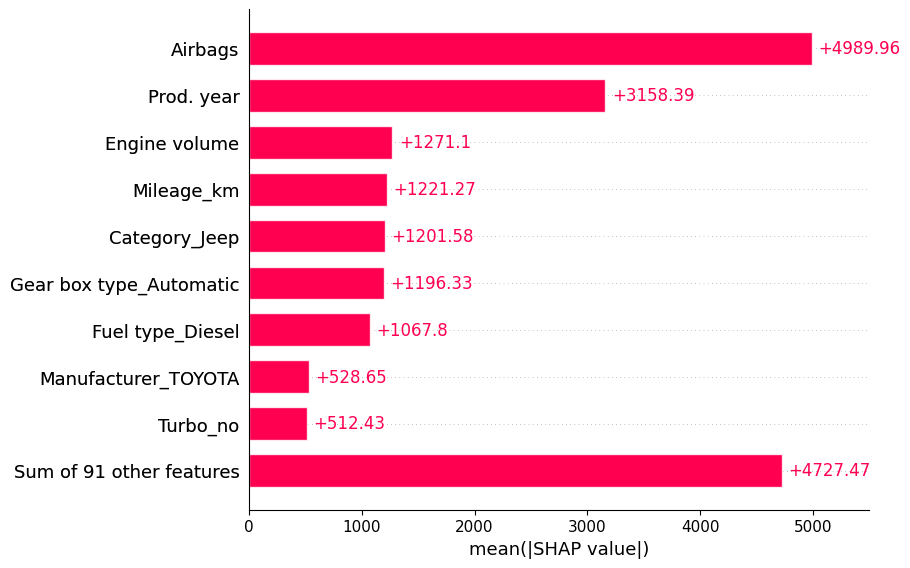

In [ ]:
# Gráfico de influencia de las variables
shap_values = explainer(x_test_f)
shap.plots.bar(shap_values)

In [ ]:
# Gráfico de fuerza del primer registro

shap.initjs()
shap.plots.force(shap_values[0],figsize=(15, 3))


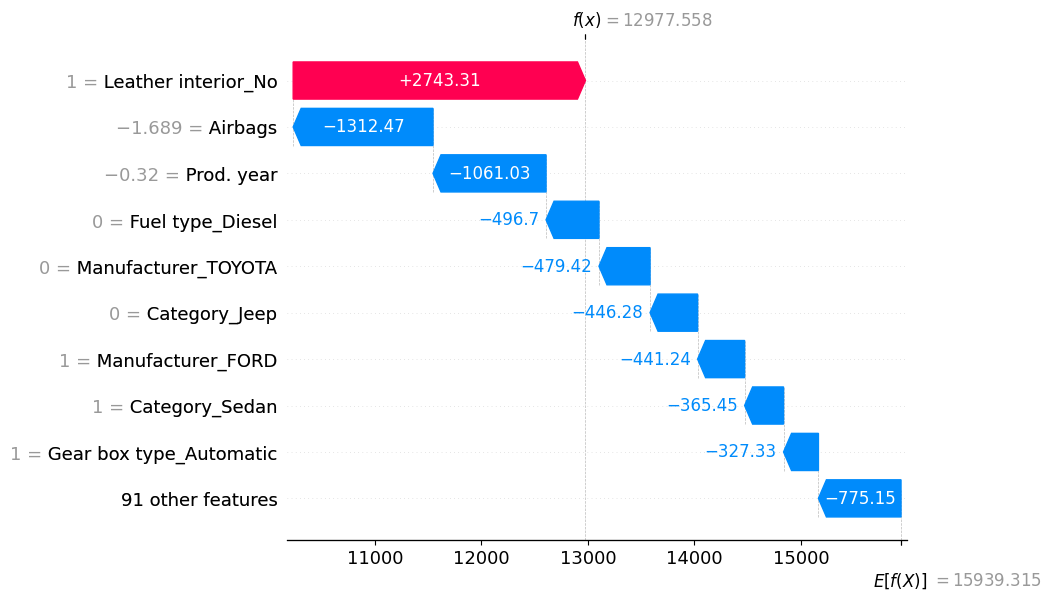

In [ ]:
# Gráfico de cascada para primer registro
shap.plots.waterfall(shap_values[0])

##DATA STORYTELLING - Preprocesamiento y modelado

Una vez generada las variables codificafas se obtuvo un dataset de muy alta dimensionalidad (más de 100 variables), sin embargo, se realizaron técnicas de feature selection que permitieron reducir la cantidad de variables empleadas para la predicción a solamente 7 manteniendo el poder de predicción entre el 30 y el 40% utilizando un modelo de regresión lineal. Esto es muy importante ya que simplifica significativamente el modelo manteniendo cierto poder predictivo (utilizando solo el 6% de las variables se mantiene el 80% del poder de predicción).

Las variables más significativas resultaron ser las siguientes:

In [ ]:
list(sfs7.k_feature_names_)

['Prod. year',
 'Airbags',
 'Manufacturer_HYUNDAI',
 'Manufacturer_SSANGYONG',
 'Category_Jeep',
 'Fuel type_Diesel',
 'Gear box type_Tiptronic']

Luego de la validación del modelo se alcanzó un R2 de 0,3. Indicando que el modelo es capaz de explicar el 30% de la variablidad de los datos:

Para poder mejorar la performance de predicción fueron evaluados más modelos con diferentes parametrizaciones para poder encontrar el más performante.
Luego de testear 172 modelos se consiguió identificar el más performante con un R2 cercano a 0,7 en entrenamiento y 0,72 en su validación. Los parámetros del modelo son los siguientes:

In [ ]:
print(grid_search.best_params_)

{'estimator': LGBMRegressor(), 'estimator__learning_rate': 0.1, 'estimator__max_depth': -1, 'estimator__n_estimators': 100, 'estimator__num_leaves': 31}


Se utilizó el algoritmo LGBM con un learning rate de 0,1, sin límite de profundidad en los árboles de decisión, 100 árboles dentro del modelo con una cantidad de hojas de 31.

Como el modelo no es intuitivo a la hora de explicar su funcionamiento se utiliza una librería que permite explicar el impacto de cada variable en la predicción del precio del auto obteniendo un gráfico de fuerzas como el siguiente:

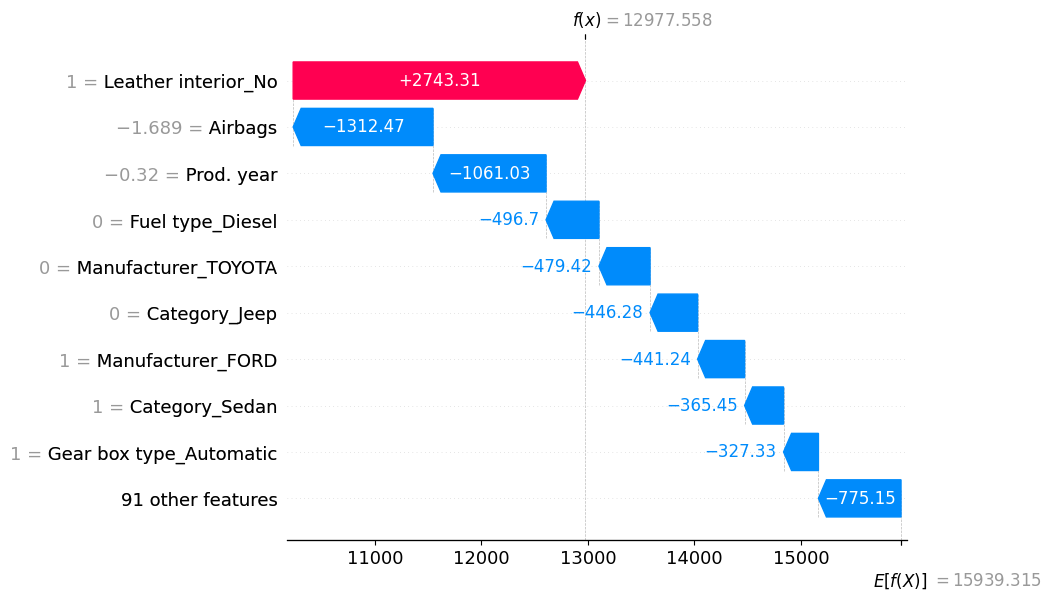

In [ ]:
shap.plots.waterfall(shap_values[0])

En este gráfico es posible observar que el promedio de precios de autos está alrededor de 16000 USD. Este valor es disminuido por el impacto de la mayoría de las variables (como su año de producción, que no sea Diesel, que sea Ford y no Toyota, que no sea Jeep y que sea Sedan, que tenga caja automática y que tenga menos airbags que el promedio). Sin embargo, se puede observar que en este caso que no tenga interior de cuero aumenta el precio considerablemente acercando el precio a los 12000 USD.

Este modelo junto al pipeline de pre-procesamiento es descargado con el siguiente código:

In [ ]:
import joblib
import gzip

# Descarga del modelo
with gzip.open('pipeline_model.pkl.gz', 'wb') as f:
    joblib.dump({
        'pipeline_preprocesamiento_1': pipeline_preprocesamiento_1,
        'pipeline_preprocesamiento_2': pipeline_preprocesamiento_2,
        'model': grid_search.best_estimator_
    }, f)

from google.colab import files
files.download('pipeline_model.pkl.gz')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>